<a href="https://colab.research.google.com/github/prasanth23590/RNNStocks/blob/main/RNN_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install numpy pandas matplotlib scikit-learn tensorflow yfinance

In [5]:
import yfinance as yf
import pandas as pd

# List of NASDAQ stocks for prediction (you can modify this list)
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA', 'INTC', 'CSCO', 'ADBE']

# Download historical data for the past 10 years
data = yf.download(tickers, start='2013-01-01', end='2024-11-11')['Close']

# Display the first few rows of the dataset
print(data.head())

[*********************100%***********************]  10 of 10 completed

Ticker                          AAPL       ADBE     AMZN       CSCO  \
Date                                                                  
2013-01-02 00:00:00+00:00  19.608213  38.340000  12.8655  20.340000   
2013-01-03 00:00:00+00:00  19.360714  37.750000  12.9240  20.450001   
2013-01-04 00:00:00+00:00  18.821428  38.130001  12.9575  20.480000   
2013-01-07 00:00:00+00:00  18.710714  37.939999  13.4230  20.290001   
2013-01-08 00:00:00+00:00  18.761070  38.139999  13.3190  20.309999   

Ticker                         GOOGL       INTC       META       MSFT  \
Date                                                                    
2013-01-02 00:00:00+00:00  18.099348  21.379999  28.000000  27.620001   
2013-01-03 00:00:00+00:00  18.109859  21.320000  27.770000  27.250000   
2013-01-04 00:00:00+00:00  18.467718  21.160000  28.760000  26.740000   
2013-01-07 00:00:00+00:00  18.387136  21.250000  29.420000  26.690001   
2013-01-08 00:00:00+00:00  18.350851  21.090000  29.059999  26.5

In [6]:
# Fill missing values with forward fill method
data.fillna(method='ffill', inplace=True)

<ipython-input-6-801af9ea4dc0>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [9]:
import numpy as np
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build LSTM model
model = Sequential()

# Add LSTM layers with dropout to prevent overfitting
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer (one value per stock)
model.add(Dense(units=X_train.shape[2]))

# Compile the model with mean squared error loss and Adam optimizer
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary to verify architecture
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          12,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,910 (128.55 KB)

 Trainable params: 32,910 (128.55 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - loss: 0.0659 - val_loss: 0.0033
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.0112 - val_loss: 0.0019
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 0.0074 - val_loss: 0.0019
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - loss: 0.0067 - val_loss: 0.0013
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.0059 - val_loss: 0.0014
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.0053 - val_loss: 0.0012
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 0.0045 - val_loss: 0.0011
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - loss: 0.0044 - val_loss: 0.0013
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 0.0040 - val_loss: 9.3438e-04
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0035 - val_loss: 0.0012
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 0.0035 - val_loss: 9.2322e-04
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step -

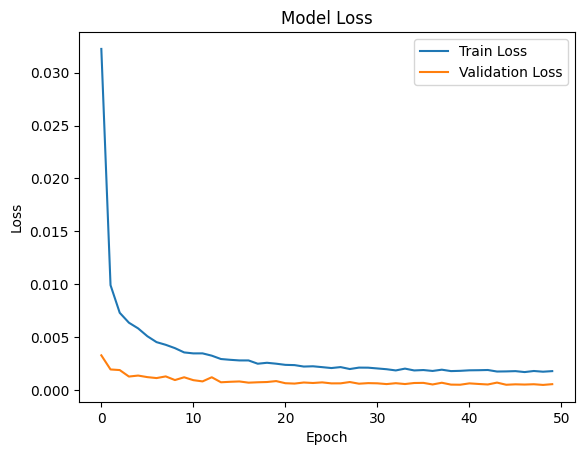

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [14]:
predicted_prices = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [15]:
predicted_prices = scaler.inverse_transform(predicted_prices)

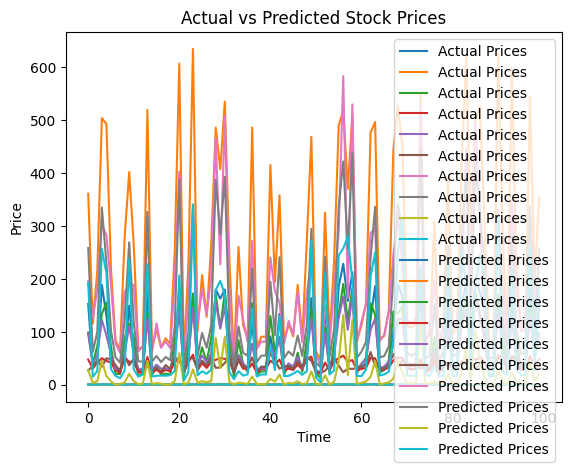

In [16]:
plt.plot(y_test[-100:], label="Actual Prices")
plt.plot(predicted_prices[-100:], label="Predicted Prices")
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predicted_prices)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 25479.535054694436


In [18]:
growth_potential = (predicted_prices[-1] / y_test[-1]) * 100

for i in range(len(tickers)):
    print(f"Stock: {tickers[i]}, Predicted Growth Potential: {growth_potential[i]:.2f}%")

Stock: AAPL, Predicted Growth Potential: 26140.04%
Stock: MSFT, Predicted Growth Potential: 79747.65%
Stock: GOOGL, Predicted Growth Potential: 24725.69%
Stock: AMZN, Predicted Growth Potential: 7478.97%
Stock: NVDA, Predicted Growth Potential: 21688.14%
Stock: META, Predicted Growth Potential: 15773.75%
Stock: TSLA, Predicted Growth Potential: 91286.19%
Stock: INTC, Predicted Growth Potential: 51720.55%
Stock: CSCO, Predicted Growth Potential: 18093.27%
Stock: ADBE, Predicted Growth Potential: 44243.79%


In [19]:
top_stocks = sorted(zip(tickers, growth_potential), key=lambda x: x[1], reverse=True)[:10]

print("Top Stocks with Highest Growth Potential:")
for stock in top_stocks:
    print(f"Stock: {stock[0]}, Predicted Growth Potential: {stock[1]:.2f}%")

Top Stocks with Highest Growth Potential:
Stock: TSLA, Predicted Growth Potential: 91286.19%
Stock: MSFT, Predicted Growth Potential: 79747.65%
Stock: INTC, Predicted Growth Potential: 51720.55%
Stock: ADBE, Predicted Growth Potential: 44243.79%
Stock: AAPL, Predicted Growth Potential: 26140.04%
Stock: GOOGL, Predicted Growth Potential: 24725.69%
Stock: NVDA, Predicted Growth Potential: 21688.14%
Stock: CSCO, Predicted Growth Potential: 18093.27%
Stock: META, Predicted Growth Potential: 15773.75%
Stock: AMZN, Predicted Growth Potential: 7478.97%
